In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
from scipy import stats
from scipy.stats import norm

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
print("The train data has {0} rows and {1} columns.".format(train.shape[0], train.shape[1]))
print("The test data has {0} rows and {1} columns".format(test.shape[0], test.shape[1]))

The train data has 1460 rows and 81 columns.
The test data has 1459 rows and 80 columns


In [7]:
miss =(train.isnull().sum()/len(train))
miss = miss[miss > 0]
miss.sort_values(inplace = True)
print(miss.count())
miss

19


/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [8]:
miss = miss.to_frame()

In [9]:
miss.columns = ['count']
miss.index.names = ['Names']
miss['Names'] = miss.index
miss

,count,Names
Names,,
Electrical,0.000685,Electrical
MasVnrType,0.005479,MasVnrType
MasVnrArea,0.005479,MasVnrArea
BsmtQual,0.025342,BsmtQual
BsmtCond,0.025342,BsmtCond
BsmtFinType1,0.025342,BsmtFinType1
BsmtExposure,0.026027,BsmtExposure
BsmtFinType2,0.026027,BsmtFinType2
GarageCond,0.055479,GarageCond


In [10]:
import seaborn as sns

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [11]:
print ("The skewness of SalePrice is {}".format(train['SalePrice'].skew()))

The skewness of SalePrice is 1.8828757597682129


/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/lib/python3/dist-packages/seaborn/categorical.py:1165: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


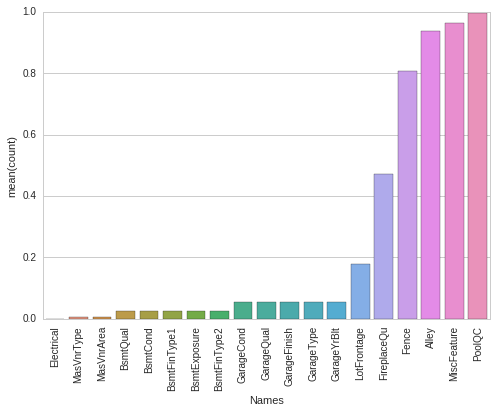

In [12]:
sns.set(style='whitegrid', color_codes=True)
sns.barplot(x = 'Names', y = 'count', data=miss)
plt.xticks(rotation = 90)
sns.plt.show()

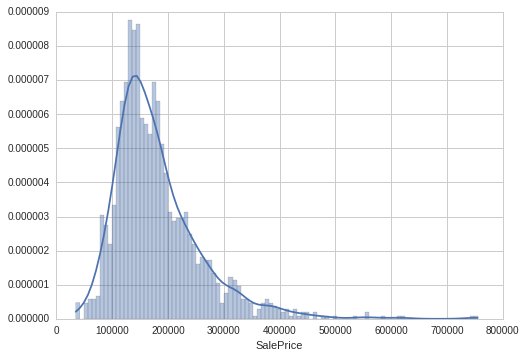

In [16]:
#SalePrice
sns.distplot(train['SalePrice'], bins=100)
#train['SalePrice'].head()

In [17]:
print ("The skewness of SalePrice is {}".format(train['SalePrice'].skew()))

The skewness of SalePrice is 1.8828757597682129


Skewness is 0.121335062205


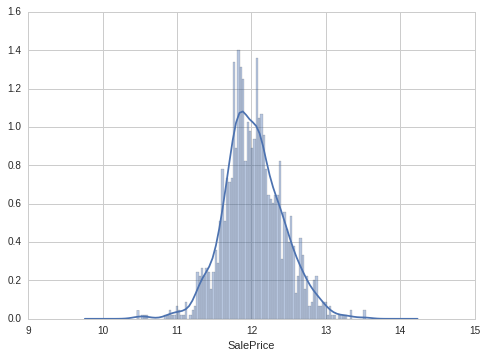

In [19]:
target = np.log(train['SalePrice'])
print ('Skewness is', target.skew())
sns.distplot(target,bins=100)

In [20]:
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 38 numeric and 43 categorical columns in train data


In [21]:
numeric_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000


In [833]:
cat_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [22]:
del numeric_data['Id']

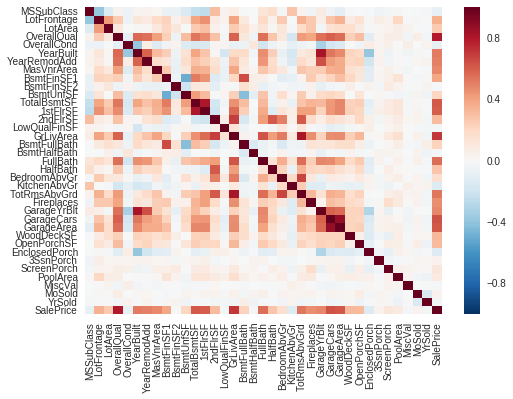

In [23]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

In [24]:
dir(pd)

['Categorical',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'ExcelFile',
 'ExcelWriter',
 'Expr',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int64Index',
 'Interval',
 'IntervalIndex',
 'MultiIndex',
 'NaT',
 'Panel',
 'Panel4D',
 'Period',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseArray',
 'SparseDataFrame',
 'SparseList',
 'SparseSeries',
 'Term',
 'TimeGrouper',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt64Index',
 'WidePanel',
 '_DeprecatedModule',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_hashtable',
 '_lib',
 '_libs',
 '_np_version_under1p10',
 '_np_version_under1p11',
 '_np_version_under1p12',
 '_np_version_under1p13',
 '_np_version_under1p14',
 '_np_version_under1p15',
 '_tslib',
 '_version',
 'api',
 'bdate_range',
 'compat',
 'concat',
 'core',
 'crosstab',
 'cut',
 'date_range',
 'dateti

In [25]:
print(corr['SalePrice'].sort_values(ascending=False)[:15],"\n")
print("----------------------------")
print(corr['SalePrice'].sort_values(ascending=False)[-5:],"\n")

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

----------------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



In [26]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [29]:
pivot = train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)
pivot
#pivot.sort

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


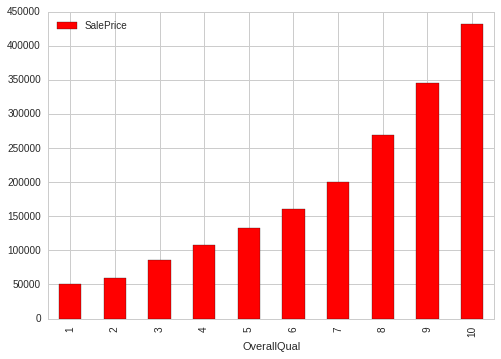

In [30]:
pivot.plot(kind='bar',color='red')

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


TypeError: 'numpy.float64' object cannot be interpreted as an integer

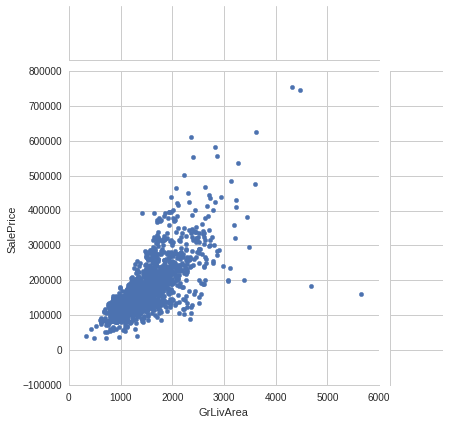

In [31]:
#GrLivArea
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'], )

In [32]:
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [33]:
sp_pivot = train.pivot_table(index='SaleCondition', 
                             values='SalePrice',aggfunc=np.median)
sp_pivot

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


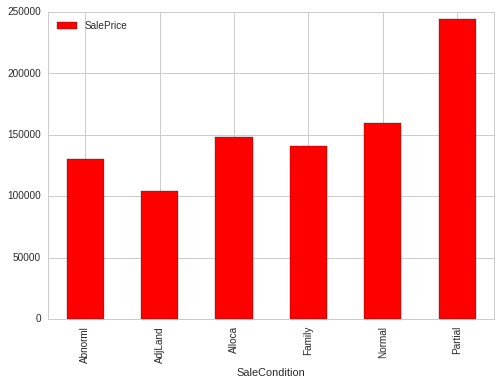

In [34]:
sp_pivot.plot(kind='bar',color='red')

In [35]:
cat = [f for f in train.columns if train.dtypes[f] == 'object']
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [36]:
def anova(frame):
    anv=pd.DataFrame()
    anv['features'] = cat
    pvals=[]
    for c in cat:
        samples = []
        for cls in frame[c].unique():
            s=frame[frame[c]==cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

In [37]:
cat_data['SalePrice'] = train.SalePrice.values
cat_data

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal,143000
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,307000
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal,200000
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml,129900
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal,118000


In [38]:
k = anova(cat_data)
k

/usr/lib/python3/dist-packages/scipy/stats/stats.py:2942: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


,features,pval
8,Neighborhood,1.558600e-225
18,ExterQual,1.439551e-204
30,KitchenQual,3.032213e-192
20,Foundation,5.791895e-91
27,HeatingQC,2.667062e-67
42,SaleCondition,7.988268e-44
15,Exterior1st,2.586089e-43
16,Exterior2nd,4.842186e-43
41,SaleType,5.039767e-42
0,MSZoning,8.817634e-35


In [39]:
k['disparity'] = np.log(1./k['pval'].values)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/lib/python3/dist-packages/seaborn/categorical.py:1165: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

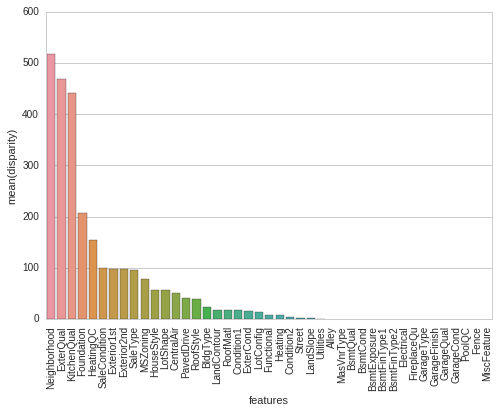

In [40]:
sns.barplot(data=k,x='features',y='disparity')
plt.xticks(rotation=90)
plt

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


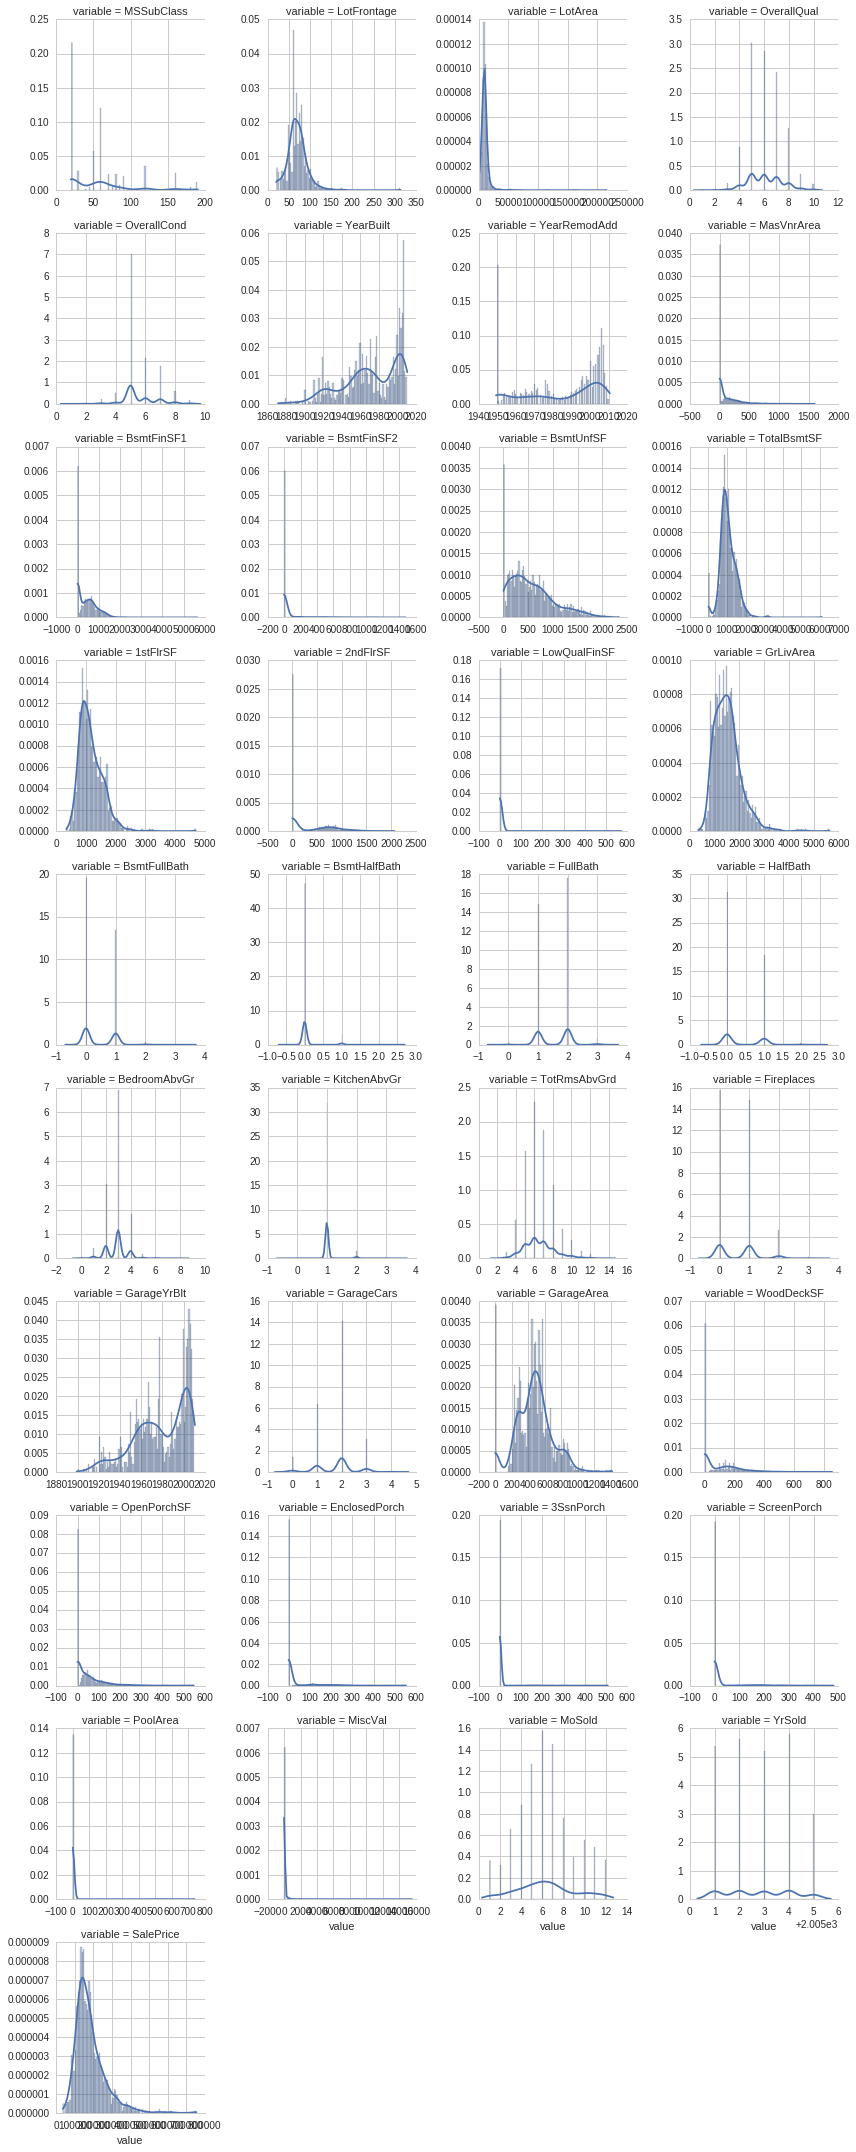

In [47]:
num=[f for f in train.columns if train.dtypes[f] != 'object']

num.remove('Id')
nd = pd.melt(train,value_vars=num)
n1=sns.FacetGrid(nd,col='variable',col_wrap=4,sharex=False,sharey=False)
n1=n1.map(sns.distplot,'value',bins=100)
n1

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/lib/python3/dist-packages/seaborn/categorical.py:444: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


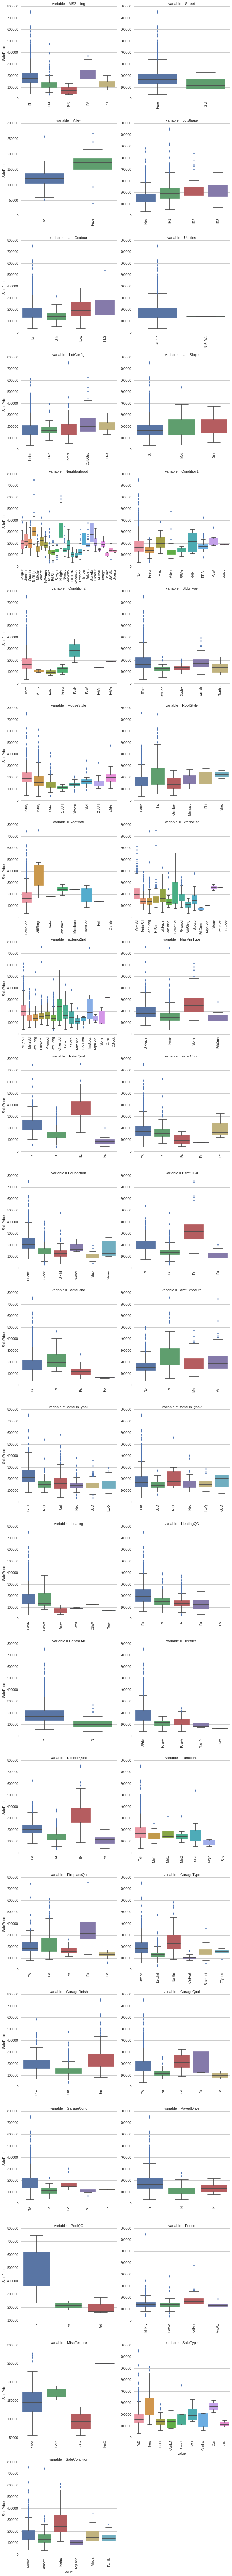

In [49]:
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)

cat=[f for f in train.columns if train.dtypes[f]=='object']

p=pd.melt(train, id_vars='SalePrice',value_vars=cat)
g=sns.FacetGrid(p,col='variable',col_wrap=2,sharex=False,sharey=False,size=5)
g=g.map(boxplot, 'value','SalePrice')
g

In [50]:
#removing outliers
train.drop(train[train['GrLivArea']>4000].index,inplace=True)
train.shape

(1456, 81)

In [51]:
print(test['GarageQual'].mode())
print(test['GarageCond'].mode())
print(test['GarageFinish'].mode())
print(np.nanmedian(test['GarageYrBlt']))

0    TA
dtype: object
0    TA
dtype: object
0    Unf
dtype: object
1979.0


In [52]:
test.loc[666,'GarageQual'] = "TA"
test.loc[666,'GarageCond'] = "TA"
test.loc[666,'GarageFinish'] = "Unf"
test.loc[666,'GarageYrBlt'] = "1979"

In [53]:
test.loc[1116,'GarageType'] = np.nan

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data,var,fill_na=None):
    if fill_na is not None:
        data[var].fillna(fill_na,inplace=True)
    le.fit(data[var])
    data[var]=le.transform(data[var])
    return data

In [55]:
alldata = train.append(test)
alldata.shape

(2915, 81)

In [56]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [57]:
lot_frontage_by_neighborhood = train['LotFrontage'].groupby(train['Neighborhood'])

for key, group in lot_frontage_by_neighborhood:
    idx = (alldata['Neighborhood'] == key) & (alldata['LotFrontage'].isnull())
    alldata.loc[idx,'LotFrontage'] = group.median()

In [58]:

#imputing missing values
alldata["MasVnrArea"].fillna(0, inplace=True)
alldata["BsmtFinSF1"].fillna(0, inplace=True)
alldata["BsmtFinSF2"].fillna(0, inplace=True)
alldata["BsmtUnfSF"].fillna(0, inplace=True)
alldata["TotalBsmtSF"].fillna(0, inplace=True)
alldata["GarageArea"].fillna(0, inplace=True)
alldata["BsmtFullBath"].fillna(0, inplace=True)
alldata["BsmtHalfBath"].fillna(0, inplace=True)
alldata["GarageCars"].fillna(0, inplace=True)
alldata["GarageYrBlt"].fillna(0.0, inplace=True)
alldata["PoolArea"].fillna(0, inplace=True)    

In [59]:
qual_dict = {np.nan: 0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
name = np.array(['ExterQual','PoolQC','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond'])

for i in name:
    alldata[i] = alldata[i].map(qual_dict).astype(int)

alldata['BsmtExposure'] = alldata["BsmtExposure"].map({np.nan:0,"No":1,"Mn":2,"Av":3,"Gd":4}).astype(int)

bsmt_fin_dict = {np.nan:0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}

alldata["BsmtFinType1"] = alldata["BsmtFinType1"].map(bsmt_fin_dict).astype(int)


alldata["BsmtFinType2"] = alldata["BsmtFinType2"].map(bsmt_fin_dict).astype(int)

alldata["Functional"] = alldata["Functional"].map({np.nan:0,"Sal":1,"Sev":2,"Maj2":3,"Maj1":4,"Mod":5,"Min2":6,"Min1":7,"Typ":8}).astype(int)

alldata["GarageFinish"] = alldata["GarageFinish"].map({np.nan:0,"Unf":1,"RFn":2,"Fin":3}).astype(int)
alldata["Fence"] = alldata["Fence"].map({np.nan:0,"MnWw":1,"GdWo":2,"MnPrv":3,"GdPrv":4}).astype(int)

#encoding data
alldata["CentralAir"] = (alldata["CentralAir"] == "Y") * 1.0

varst = np.array(['MSSubClass','LotConfig','Neighborhood','Condition1',
                  'BldgType','HouseStyle','RoofStyle','Foundation',
                  'SaleCondition'])
for x in varst:
    factorize(alldata,x)

alldata = factorize(alldata,"MSZoning","RL")
alldata = factorize(alldata,"Exterior1st","Other")
alldata = factorize(alldata,"Exterior2nd","Other")
alldata = factorize(alldata,"MasVnrType","None")
alldata = factorize(alldata,"SaleType","Oth")

In [60]:
alldata.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,0,3,1,706.0,0.0,...,8,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,0,3,4,978.0,0.0,...,8,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,0,3,2,486.0,0.0,...,8,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,0,4,1,216.0,0.0,...,8,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,0,3,3,655.0,0.0,...,8,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [61]:
#Feature Engineering
#creating new variable(1 or 0) based on irregular count levels
#The level with highest count is kept as 1 and rest as 0
alldata["IsRegularLotShape"] = (alldata["LotShape"] == "Reg") * 1
alldata["IsLandLevel"] = (alldata["LandContour"] == "Lvl") * 1
alldata["IsLandSlopeGentle"] = (alldata["LandSlope"] == "Gtl") * 1
alldata["IsElectricalSbrkr"] = (alldata["Electrical"] == "SBrkr") * 1
alldata["IsGarageDetached"] = (alldata["GarageType"] == "Detchd") * 1
alldata["IsPavedDrive"] = (alldata["PavedDrive"] == "Y") * 1
alldata["HasShed"] = (alldata["MiscFeature"] == "Shed") * 1
alldata["Remodeled"] = (alldata["YearRemodAdd"] != alldata["YearBuilt"]) * 1

#did modeling happen during the sale year?
alldata["RecentRemodel"] = (alldata["YearRemodAdd"] == alldata["YrSold"]) * 1

#Was this house sold in the year it was built
alldata["VeryNewHouse"] = (alldata["YearBuilt"] == alldata["YrSold"]) * 1

alldata["Has2ndFloor"] = (alldata["2ndFlrSF"] == 0) * 1
alldata["HasMasVnr"] = (alldata["MasVnrArea"] == 0) * 1
alldata["HasWoodDeck"] = (alldata["WoodDeckSF"] == 0) * 1
alldata["HasOpenPorch"] = (alldata["OpenPorchSF"] == 0) * 1

In [62]:
alldata["HasEnclosedPorch"] = (alldata["EnclosedPorch"] == 0) * 1
alldata["Has3SsnPorch"] = (alldata["3SsnPorch"] == 0) * 1
alldata["HasScreenPorch"] = (alldata["ScreenPorch"] == 0) * 1

In [63]:
alldata["HighSeason"] = alldata["MoSold"].replace({1:0,2:0,3:0,4:1,5:1,6:1,7:1,8:0,9:0,10:0,11:0,12:0})

In [64]:
alldata["NewerDwelling"] = alldata["MSSubClass"].replace({20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})

In [65]:
alldata.shape

(2915, 100)

In [66]:
#create alldata2
alldata2 = train.append(test)

alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnormal':1,'Alloca':1,'AdjLand':1,'Family':1,'Normal':0,'Partial':0})

In [67]:
#house completed before sale or not
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml":0,"Alloca":0,"AdjLand":0,"Family":0,"Normal":0,"Partial":1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex':0,'Gd':0,'TA':0,'Fa':1,'Po':1})

In [68]:
#calculating total area using all area columns
area_cols = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
             'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
             '2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF',
             'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
             'LowQualFinSF','PoolArea']

In [69]:
alldata["TotalArea"] = alldata[area_cols].sum(axis=1)
alldata["TotalArea1st2nd"] = alldata["1stFlrSF"] + alldata["2ndFlrSF"]
alldata["Age"] = 2010 - alldata["YearBuilt"]
alldata["TimeSinceSold"] = 2010 - alldata["YrSold"]
alldata["SeasonSold"] = alldata["MoSold"].map({12:0,1:0,2:0,3:1,4:1,5:1,6:2,7:2,8:2,9:3,10:3,11:3}).astype(int)
alldata["YearsSinceRemodel"] = alldata["YrSold"] - alldata["YearRemodAdd"]

In [70]:
alldata["OverallQual"].value_counts()

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     27
2      13
1       4
Name: OverallQual, dtype: int64

In [71]:
alldata["SimplOverallQual"] = alldata.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplOverallCond"] = alldata.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplPoolQC"] = alldata.PoolQC.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2})
alldata["SimplGarageCond"] = alldata.GarageCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplGarageQual"] = alldata.GarageQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFunctional"] = alldata.Functional.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
alldata["SimplKitchenQual"] = alldata.KitchenQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplHeatingQC"] = alldata.HeatingQC.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtFinType1"] = alldata.BsmtFinType1.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtFinType2"] = alldata.BsmtFinType2.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtCond"] = alldata.BsmtCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtQual"] = alldata.BsmtQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterCond"] = alldata.ExterCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterQual"] = alldata.ExterQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})


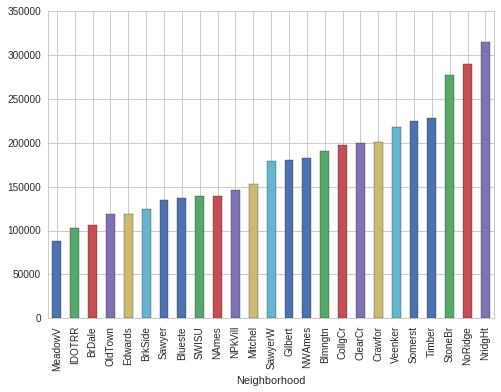

In [72]:
train['SalePrice'].groupby(train['Neighborhood']).median().sort_values().plot(kind='bar')

In [73]:
neighborhood_map = {"MeadowV":0,"IDOTRR":1,"BrDale":1,"OldTown":1,
                    "Edwards":1,"BrkSide":1,"Sawyer":1,"Blueste":1,
                    "SWISU":2,"NAmes":2,"NPkVill":2,"Mitchel":2,
                    "SawyerW":2,"Gilbert":2,"NWAmes":2,"Blmngtn":2,
                    "CollgCr":2,"ClearCr":3,"Crawfor":3,"Veenker":3,
                    "Somerst":3,"Timber":3,"StoneBr":4,"NoRidge":4,
                    "NridgHt":4}

In [74]:
alldata["NeighborhoodBin"] = alldata2["Neighborhood"].map(neighborhood_map)
alldata.loc[alldata2.Neighborhood == "NridgHt","Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == "Crawfor","Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == "StoneBr","Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == "Somerst","Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == "NoRidge","Neighborhood_Good"] = 1

In [75]:
alldata["Neighborhood_Good"].fillna(0,inplace=True)
alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml':1,'Alloca':1,'AdjLand':1,'Family':1,'Normal':0,'Partial':0})

In [76]:
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({'Abnorml':0,'Alloca':0,'AdjLand':0,'Family':0,'Normal':0,'Partial':1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex':0,'Gd':0,'TA':0,'Fa':1,'Po':1})
alldata.shape

(2915, 126)

In [77]:
train_new = alldata[alldata['SalePrice'].notnull()]
test_new = alldata[alldata['SalePrice'].isnull()]
print("Train: ",train_new.shape)
print("-----------------")
print("Test: ",test_new.shape)

Train:  (1456, 126)
-----------------
Test:  (1459, 126)


In [78]:
#get numeric features
numeric_features = [f for f in train_new.columns 
                            if train_new[f].dtype != object]

#transform the numeric features using log(x + 1)
from scipy.stats import skew
skewed = train_new[numeric_features].apply(
    lambda x:skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new[skewed] = np.log1p(train_new[skewed])
test_new[skewed] = np.log1p(train_new[skewed])
del test_new['SalePrice']

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(train_new[numeric_features])
scaled = scaler.transform(train_new[numeric_features])

for i, col in enumerate(numeric_features):
    train_new[col] = scaled[:,i]

numeric_features.remove('SalePrice')
scaled = scaler.fit_transform(test_new[numeric_features])

for i, col in enumerate(numeric_features):
    test_new[col] = scaled[:,i]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [93]:
test_new[numeric_features].isnull().any()
(test_new['1stFlrSF'].isnull()==True).count()

1459

In [ ]:
#onehot encoding
def onehot(onehot_df,df,column_name,fill_na):
    onehot_df[column_name] = df[column_name]
    if fill_na is not None:
        onehot_df[column_name].fillna(fill_na,inplace=True)
        
    dummies = pd.get_dummies(onehot_df[column_name],axis=1)
    return onehot_df

In [894]:
def munge_onehot(df):
    onehot_df = pd.DataFrame(index = df.index)
    
    onehot_df = onehot(onehot_df,df,"MSSubClass",None)
    onehot_df = onehot(onehot_df,df,"MSZoning","RL")
    onehot_df = onehot(onehot_df,df,"LotConfig",None)
    onehot_df = onehot(onehot_df,df,"Neighborhood",None)
    onehot_df = onehot(onehot_df,df,"Condition1",None)
    onehot_df = onehot(onehot_df,df,"BldgType",None)
    onehot_df = onehot(onehot_df,df,"HouseStyle",None)
    onehot_df = onehot(onehot_df,df,"RoofStyle",None)
    onehot_df = onehot(onehot_df,df,"Exterior1st","VinylSd")
    onehot_df = onehot(onehot_df,df,"Exterior2st","VinylSd")
    onehot_df = onehot(onehot_df,df,"Foundation",None)
    onehot_df = onehot(onehot_df,df,"SaleType","WD")
    onehot_df = onehot(onehot_df,df,"SaleCondition","Normal")
    
    temp_df = df[["MasVnrType","MasVnrArea"]].copy()
    idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"] == "None") | 
                                    (df["MasVnrType"].isnull()))
    temp_df.loc[idx, "MasVnrType"] = "BrkFace"
    onehot_df = onehot(onehot_df,temp_df,"MasVnrType","None")
    
    onehot_df = onehot(onehot_df,df,"LotShape",None)
    onehot_df = onehot(onehot_df,df,"LandContour",None)
    onehot_df = onehot(onehot_df,df,"Electrical","SBrkr")
    onehot_df = onehot(onehot_df,df,"GarageType",None)
    onehot_df = onehot(onehot_df,df,"PavedDrive",None)
    onehot_df = onehot(onehot_df,df,"MiscFeature",None)
    onehot_df = onehot(onehot_df,df,"Street",None)
    onehot_df = onehot(onehot_df,df,"Alley",None)
    onehot_df = onehot(onehot_df,df,"Condition2",None)
    onehot_df = onehot(onehot_df,df,"RoofMat1",None)
    onehot_df = onehot(onehot_df,df,"Heating",None)
    
    #we'll have these as numerical variables too
    onehot_df = onehot(onehot_df,df,"ExterQual",None)
    onehot_df = onehot(onehot_df, df, "ExterCond", "None")
    onehot_df = onehot(onehot_df, df, "BsmtQual", "None")
    onehot_df = onehot(onehot_df, df, "BsmtCond", "None")
    onehot_df = onehot(onehot_df, df, "HeatingQC", "None")
    onehot_df = onehot(onehot_df, df, "KitchenQual", "TA")
    onehot_df = onehot(onehot_df, df, "FireplaceQu", "None")
    onehot_df = onehot(onehot_df, df, "GarageQual", "None")
    onehot_df = onehot(onehot_df, df, "GarageCond", "None")
    onehot_df = onehot(onehot_df, df, "PoolQC", "None")
    onehot_df = onehot(onehot_df, df, "BsmtExposure", "None")
    onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None")
    onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None")
    onehot_df = onehot(onehot_df, df, "Functional", "Typ")
    onehot_df = onehot(onehot_df, df, "GarageFinish", "None")
    onehot_df = onehot(onehot_df, df, "Fence", "None")
    onehot_df = onehot(onehot_df, df, "MoSold", None) 
    
    #dividing the years between 1871 and 2010 into slices of 20 years
    year_map = pd.concat(pd.Series("YearBin"+str(i+1),
                index=range(1871+i*20,1891+i*20)) 
                for i in range(0,7))
    yearbin_df = pd.DataFrame(index = df.index)
    yearbin_df["GarageYrBltBin"]= df.GarageYrBlt.map(year_map)
    yearbin_df["GarageYrBltBin"].fillna("NoGarage",inplace=True)
    yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
    yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)
    
    onehot_df = onehot(onehot_df,yearbin_df,"GarageYrBltBin",None)
    onehot_df = onehot(onehot_df,yearbin_df,"YearBuiltBin",None)
    onehot_df = onehot(onehot_df,yearbin_df,"YearRemodAddBin",None)
    
    return onehot_df    

In [896]:
import xgboost as xg

ModuleNotFoundError: No module named 'xgboost'